<a href="https://colab.research.google.com/github/eddymomanyi/nfl_epa_yac/blob/main/nfl_epa_yac_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nfl_data_py
!pip install pandas==2.2.2
!pip install os
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which i

In [2]:
from PIL import Image

In [3]:
import nfl_data_py as nfl

In [4]:
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [5]:
pbp = nfl.import_pbp_data([2024])

2024 done.
Downcasting floats.


In [6]:
pbp.shape

(34084, 372)

In [7]:
#from google.colab.data_table import DataTable
#DataTable.max_columns = 372
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.257819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,-0.200602,NaN,NaN,NaN,NaN,NaN,0.456761,-45.676102
3,83.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.028874,1.345418,9.321221,8.0,0.509778,0.363807,0.576656,42.334431
4,108.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.754242,0.882798,5.783560,4.0,0.668478,0.255140,0.426443,57.355690


In [8]:
pbp['week']

,week
0,1
1,1
2,1
3,1
4,1
...,...
34079,14
34080,14
34081,14
34082,14


In [9]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush']== 1)]
pbp_rp = pbp_rp.dropna(subset = ['epa', 'posteam', 'defteam'])

In [10]:
pbp_rp.shape

(25245, 372)

In [11]:
pass_epa = pbp_rp[(pbp['pass']==1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa':'pass_epa'})
pass_epa.sort_values('pass_epa', ascending=False)

<ipython-input-11-99cacc50a8a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = pbp_rp[(pbp['pass']==1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa':'pass_epa'})


,posteam,pass_epa
2,BAL,0.293871
3,BUF,0.266481
10,DET,0.240322
31,WAS,0.236512
11,GB,0.203312
6,CIN,0.192470
29,TB,0.163083
15,KC,0.140713
0,ARI,0.135019
26,PIT,0.131665


In [12]:
rush_epa = pbp_rp[(pbp_rp['rush']==1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa': 'rush_epa'})
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa.head()

,posteam,pass_epa,rush_epa
0,ARI,0.135019,-0.052030
1,ATL,0.086255,-0.069484
2,BAL,0.293871,0.038068
3,BUF,0.266481,0.046189
4,CAR,-0.124121,-0.052958


In [13]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]


In [14]:
nfl.import_team_desc().columns

Index(['team_abbr', 'team_name', 'team_id', 'team_nick', 'team_conf',
       'team_division', 'team_color', 'team_color2', 'team_color3',
       'team_color4', 'team_logo_wikipedia', 'team_logo_espn', 'team_wordmark',
       'team_conference_logo', 'team_league_logo', 'team_logo_squared'],
      dtype='object')

In [16]:
#nfl.import_team_desc()['team_color'][25]

In [17]:
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
  os.makedirs("logos")

for team in range(len(logos)):
  urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
  logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
  team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')

In [19]:
epa_with_logos.describe()

,pass_epa,rush_epa
count,32.000000,32.000000
mean,0.064591,-0.082389
std,0.119892,0.087917
min,-0.124121,-0.313425
25%,-0.028423,-0.130785
50%,0.074838,-0.082120
75%,0.136443,-0.037273
max,0.293871,0.082374


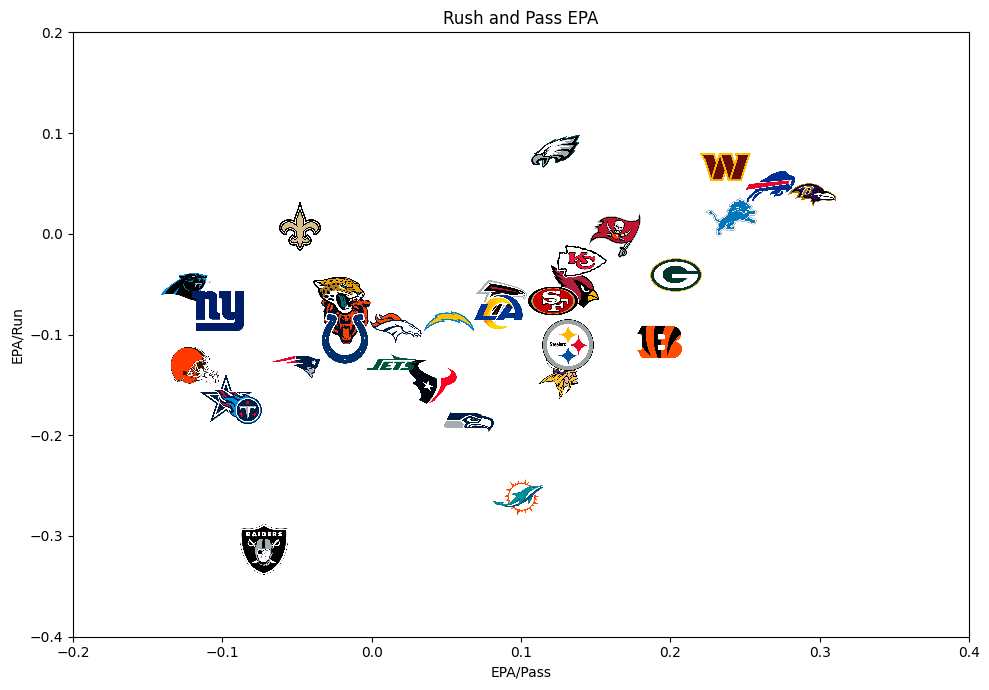

In [20]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
  img= Image.open(path)
  img=img.resize((500,500), Image.LANCZOS)
  return OffsetImage(img, zoom = .08)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
  ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
  ax.add_artist(ab)


plt.xlim(-0.2, 0.4)
plt.ylim(-0.4, 0.2)
plt.title("Rush and Pass EPA")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Run")
plt.show()

In [25]:
receiver_yac = pbp_rp[(pbp_rp['pass']==1)].groupby('receiver_player_name').agg({'pass': 'count',
'yards_after_catch': 'sum'}).reset_index().rename(columns = {'pass': 'targets', 'yards_after_catch':'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 70) & (receiver_yac['yac'] >= 300)]
receiver_yac.sort_values('yac', inplace = True)

In [22]:
receiver_yac['receiver_player_name'].iloc[0]

'R.Odunze'

In [26]:
names_and_targets=[]

for name in range(len(receiver_yac)):
  names_and_targets.append(f"{receiver_yac['receiver_player_name'].iloc[name]} ({receiver_yac['targets'].iloc[name]})")

names_and_targets

['T.Johnson (77)',
 'J.Jefferson (100)',
 'D.Douglas (70)',
 'G.Wilson (118)',
 'N.Collins (72)',
 'B.Thomas (75)',
 'T.McBride (92)',
 'J.Smith (74)',
 'J.Smith-Njigba (97)',
 'T.Hill (114)',
 'C.Lamb (126)',
 'D.Moore (138)',
 'Z.Flowers (95)',
 'B.Bowers (113)',
 'A.Kamara (79)',
 'K.Shakir (73)',
 'J.Chase (109)',
 'J.Williams (105)',
 'B.Robinson (72)']

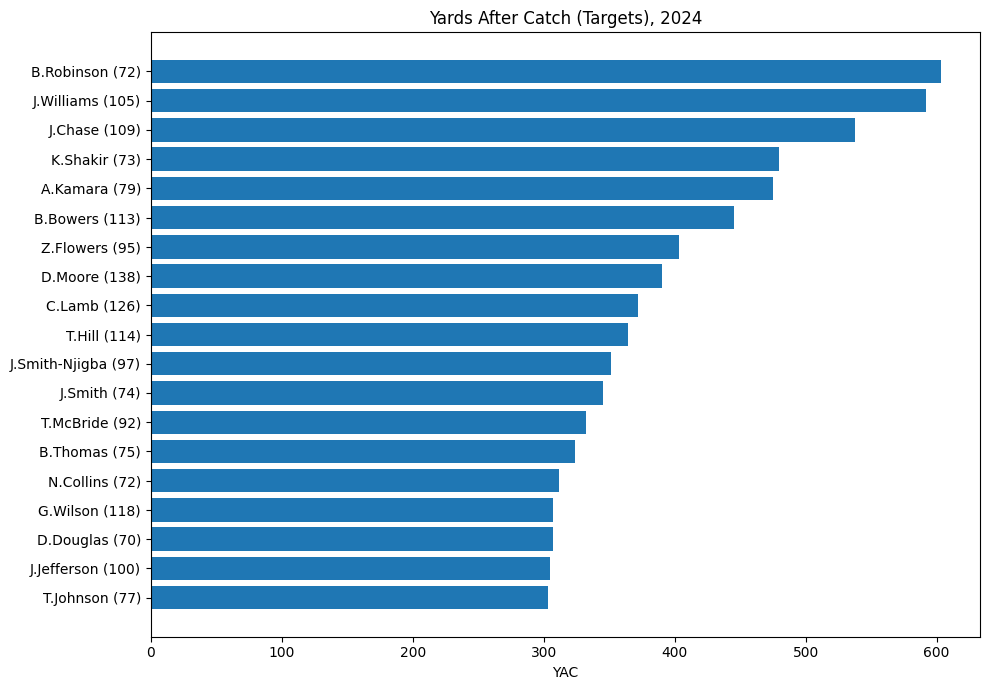

In [27]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']
targets = receiver_yac['targets']

fig, ax = plt.subplots(figsize = (10,7))

ax.barh(names_and_targets, yac)
ax.set_title("Yards After Catch (Targets), 2024")
ax.set_xlabel("YAC")
plt.show()
